In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("task_1a_dataset.csv")

In [3]:
df.replace('Bachelors', 0, inplace = True)
df.replace('Masters', 1, inplace = True)
df.replace('PHD', 2, inplace = True)


In [99]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2012,Bangalore,3,37,Male,No,0,0
1,1,2017,New Delhi,2,28,Male,No,4,0
2,0,2017,New Delhi,2,36,Male,No,3,0
3,0,2015,Bangalore,3,27,Male,Yes,5,0
4,0,2017,Bangalore,3,29,Male,No,4,0
...,...,...,...,...,...,...,...,...,...
4628,0,2013,Bangalore,3,26,Female,No,4,0
4629,1,2013,Pune,2,37,Male,No,2,1
4630,1,2018,New Delhi,3,27,Male,No,5,1
4631,0,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
df = pd.get_dummies(df , columns = ["City", "Gender", "EverBenched"], drop_first = True , dtype=int)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4633 non-null   int64
 1   JoiningYear                4633 non-null   int64
 2   PaymentTier                4633 non-null   int64
 3   Age                        4633 non-null   int64
 4   ExperienceInCurrentDomain  4633 non-null   int64
 5   LeaveOrNot                 4633 non-null   int64
 6   City_New Delhi             4633 non-null   int64
 7   City_Pune                  4633 non-null   int64
 8   Gender_Male                4633 non-null   int64
 9   EverBenched_Yes            4633 non-null   int64
dtypes: int64(10)
memory usage: 362.1 KB


In [5]:
df.JoiningYear = df.JoiningYear - 2012

<ipython-input-103-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

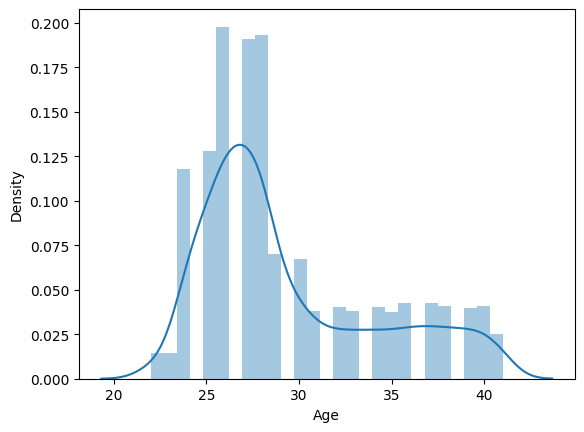

In [103]:
sns.distplot(df.Age)

In [104]:
df.Age

0       37
1       28
2       36
3       27
4       29
        ..
4628    26
4629    37
4630    27
4631    30
4632    33
Name: Age, Length: 4633, dtype: int64

In [6]:
X1 = df.drop(columns = "LeaveOrNot")
y = df.LeaveOrNot

,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,0,0,3,37,0,0,0,0,1,0
1,1,5,2,28,4,0,1,0,1,0
2,0,5,2,36,3,0,1,0,1,0
3,0,3,3,27,5,0,0,0,1,1
4,0,5,3,29,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4628,0,1,3,26,4,0,0,0,0,0
4629,1,1,2,37,2,1,0,1,1,0
4630,1,6,3,27,5,1,1,0,1,0
4631,0,0,3,30,2,0,0,0,1,1


In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X1)

X = scaler.transform(X1)

print(X)


[[-0.50783292 -1.64261035  0.53755434 ... -0.61152436  0.82231011
  -0.33838684]
 [ 1.40968127  1.03987599 -1.24518672 ... -0.61152436  0.82231011
  -0.33838684]
 [-0.50783292  1.03987599 -1.24518672 ... -0.61152436  0.82231011
  -0.33838684]
 ...
 [ 1.40968127  1.57637326  0.53755434 ... -0.61152436  0.82231011
  -0.33838684]
 [-0.50783292 -1.64261035  0.53755434 ... -0.61152436  0.82231011
   2.95519767]
 [-0.50783292 -0.03311854  0.53755434 ... -0.61152436  0.82231011
   2.95519767]]


In [107]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4628    0
4629    1
4630    1
4631    0
4632    0
Name: LeaveOrNot, Length: 4633, dtype: int64

In [108]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [109]:
device

'cuda'

In [110]:
y = np.array(y)

In [111]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", len(y_train))
print("y_test shape:", len(y_test))

X_train shape: torch.Size([3706, 9])
X_test shape: torch.Size([927, 9])
y_train shape: 3706
y_test shape: 927


In [113]:
X_train.shape

torch.Size([3706, 9])

In [114]:

class model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=9, out_features=64)
    self.layer_2 = nn.Linear(in_features=64, out_features=32)
    self.layer_3 = nn.Linear(in_features=32, out_features=1)
    self.relu = nn.ReLU()
  def forward(self, x):

    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_0 = model().to(device)
model_0

model(
  (layer_1): Linear(in_features=9, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [115]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.1)


In [116]:
len(X_train), len(y_train)

(3706, 3706)

In [117]:
def accuracy_fn(y_pred, y_true):
  correct = torch.eq(y_pred,y_true ).sum().item()
  acc = correct / len(y_pred) * 100

  return acc

In [118]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)


X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 3000

for epoch in range(epochs):

  model_0.train()


  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))


  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)


  optimizer.zero_grad()

  loss.backward()


  optimizer.step()


  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

Epoch: 0 | Loss: 0.7623, Acc: 34.13% | Test Loss: 0.7448, Test Acc: 35.2751
Epoch: 100 | Loss: 0.5706, Acc: 71.67% | Test Loss: 0.5748, Test Acc: 70.4423
Epoch: 200 | Loss: 0.5277, Acc: 74.58% | Test Loss: 0.5314, Test Acc: 75.1888
Epoch: 300 | Loss: 0.4976, Acc: 77.98% | Test Loss: 0.5021, Test Acc: 76.3754
Epoch: 400 | Loss: 0.4741, Acc: 79.30% | Test Loss: 0.4795, Test Acc: 77.8857
Epoch: 500 | Loss: 0.4551, Acc: 80.46% | Test Loss: 0.4622, Test Acc: 78.3172
Epoch: 600 | Loss: 0.4386, Acc: 82.11% | Test Loss: 0.4480, Test Acc: 80.2589
Epoch: 700 | Loss: 0.4236, Acc: 82.68% | Test Loss: 0.4367, Test Acc: 80.7983
Epoch: 800 | Loss: 0.4110, Acc: 83.81% | Test Loss: 0.4278, Test Acc: 80.7983
Epoch: 900 | Loss: 0.3997, Acc: 84.19% | Test Loss: 0.4201, Test Acc: 81.4455
Epoch: 1000 | Loss: 0.3902, Acc: 84.75% | Test Loss: 0.4131, Test Acc: 81.8770
Epoch: 1100 | Loss: 0.3818, Acc: 84.97% | Test Loss: 0.4063, Test Acc: 82.4164
Epoch: 1200 | Loss: 0.3743, Acc: 85.48% | Test Loss: 0.4003, Tes